The enitre reason for this exercise of checking for the model of targets based on given data using machine learning and to understand the simple trends behind the stock process of Ethereum using Logisitc Regression.

In [ ]:
pip install xgboost

In [ ]:
pip install yfinance

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

#Import warnings is a module that has warnings of all deprecation warning category
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import yfinance as yf

# Retrieve Ethereum data
ethereum = yf.Ticker("ETH-USD")

df = yf.download('ETH-USD')

# Get historical market data
eth_history = ethereum.history(period="max")

[*********************100%***********************]  1 of 1 completed


In [ ]:
df

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,ETH-USD,ETH-USD,ETH-USD,ETH-USD,ETH-USD,ETH-USD
Date,,,,,,
2017-11-09,320.884003,320.884003,329.451996,307.056000,308.644989,893249984
2017-11-10,299.252991,299.252991,324.717987,294.541992,320.670990,885985984
2017-11-11,314.681000,314.681000,319.453003,298.191986,298.585999,842300992
2017-11-12,307.907990,307.907990,319.153015,298.513000,314.690002,1613479936
2017-11-13,316.716003,316.716003,328.415009,307.024994,307.024994,1041889984
...,...,...,...,...,...,...
2024-12-26,3331.225830,3331.225830,3512.604492,3302.306396,3493.304199,22247726776
2024-12-27,3328.916992,3328.916992,3436.710693,3302.575684,3331.053711,24091627403


In [ ]:
df.shape

(2609, 6)

In [ ]:
df.describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,ETH-USD,ETH-USD,ETH-USD,ETH-USD,ETH-USD,ETH-USD
count,2609.000000,2609.000000,2609.000000,2609.000000,2609.000000,2.609000e+03
mean,1490.794716,1490.794716,1530.571582,1445.293867,1489.776324,1.301465e+10
std,1226.298906,1226.298906,1258.802405,1189.948092,1226.214876,1.058744e+10
min,84.308296,84.308296,85.342743,82.829887,84.279694,6.217330e+08
25%,268.704041,268.704041,274.320831,261.960510,268.692261,5.556444e+09
50%,1352.837158,1352.837158,1390.589966,1308.991455,1353.205078,1.061841e+10
75%,2405.181152,2405.181152,2472.187744,2322.337158,2401.256348,1.768550e+10
max,4812.087402,4812.087402,4891.704590,4718.039062,4810.071289,8.448291e+10


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2609 entries, 2017-11-09 to 2024-12-30
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   (Adj Close, ETH-USD)  2609 non-null   float64
 1   (Close, ETH-USD)      2609 non-null   float64
 2   (High, ETH-USD)       2609 non-null   float64
 3   (Low, ETH-USD)        2609 non-null   float64
 4   (Open, ETH-USD)       2609 non-null   float64
 5   (Volume, ETH-USD)     2609 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 142.7 KB


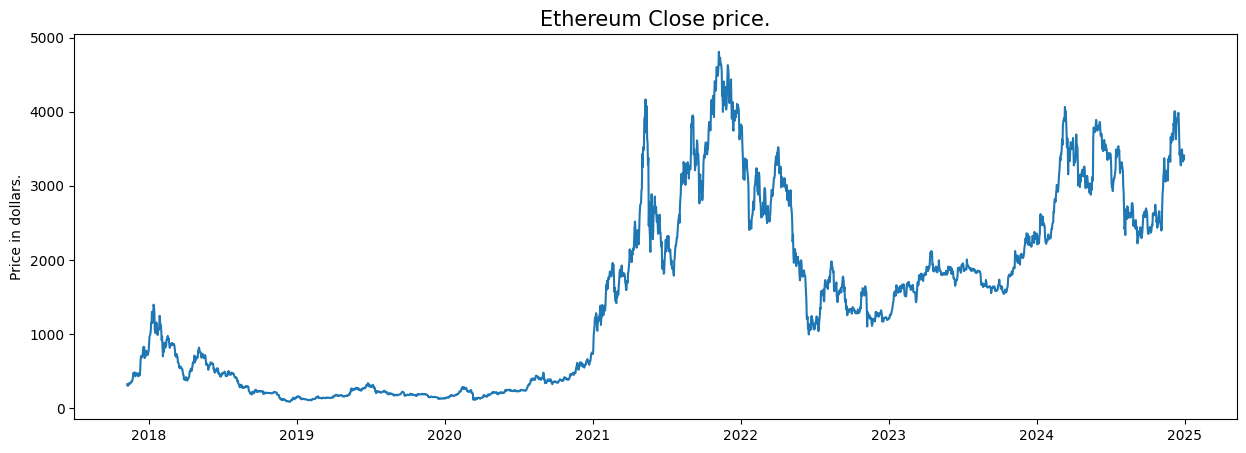

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.title('Ethereum Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

In [ ]:
#If we observe carefully we can see that the data in the ‘Close’ column and that available in the ‘Adj Close’ column is the same let’s check whether this is the case with each row or not
df[df['Close'] == df['Adj Close']].shape

(2609, 6)

In [ ]:
df.isnull().sum()
#Checking for the Null data

,,0
Price,Ticker,
Adj Close,ETH-USD,0
Close,ETH-USD,0
High,ETH-USD,0
Low,ETH-USD,0
Open,ETH-USD,0
Volume,ETH-USD,0


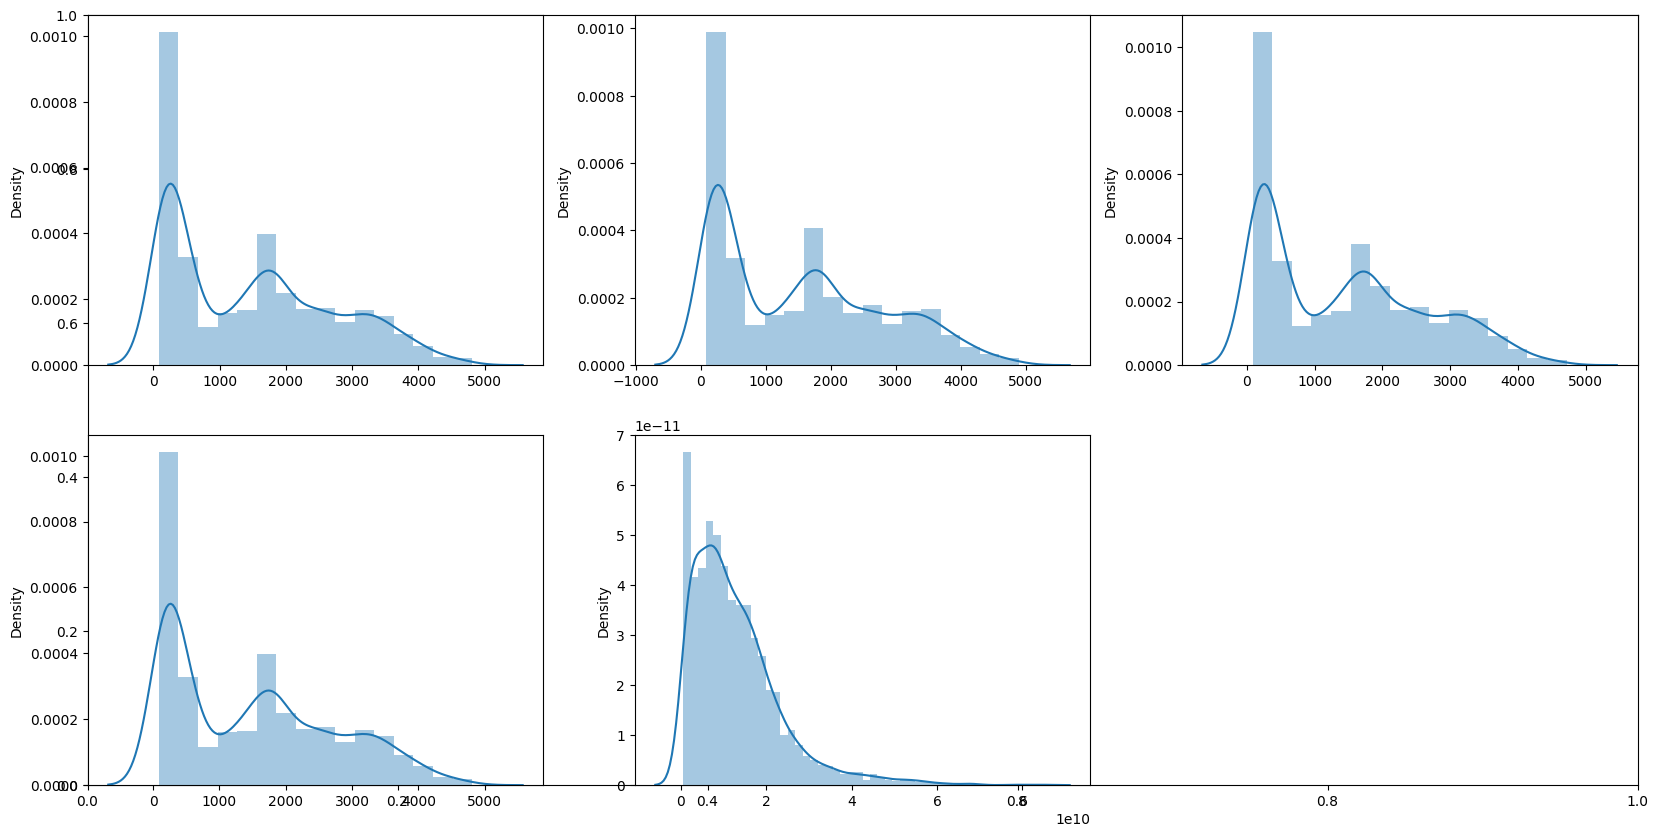

In [ ]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.distplot(df[col])
plt.show()

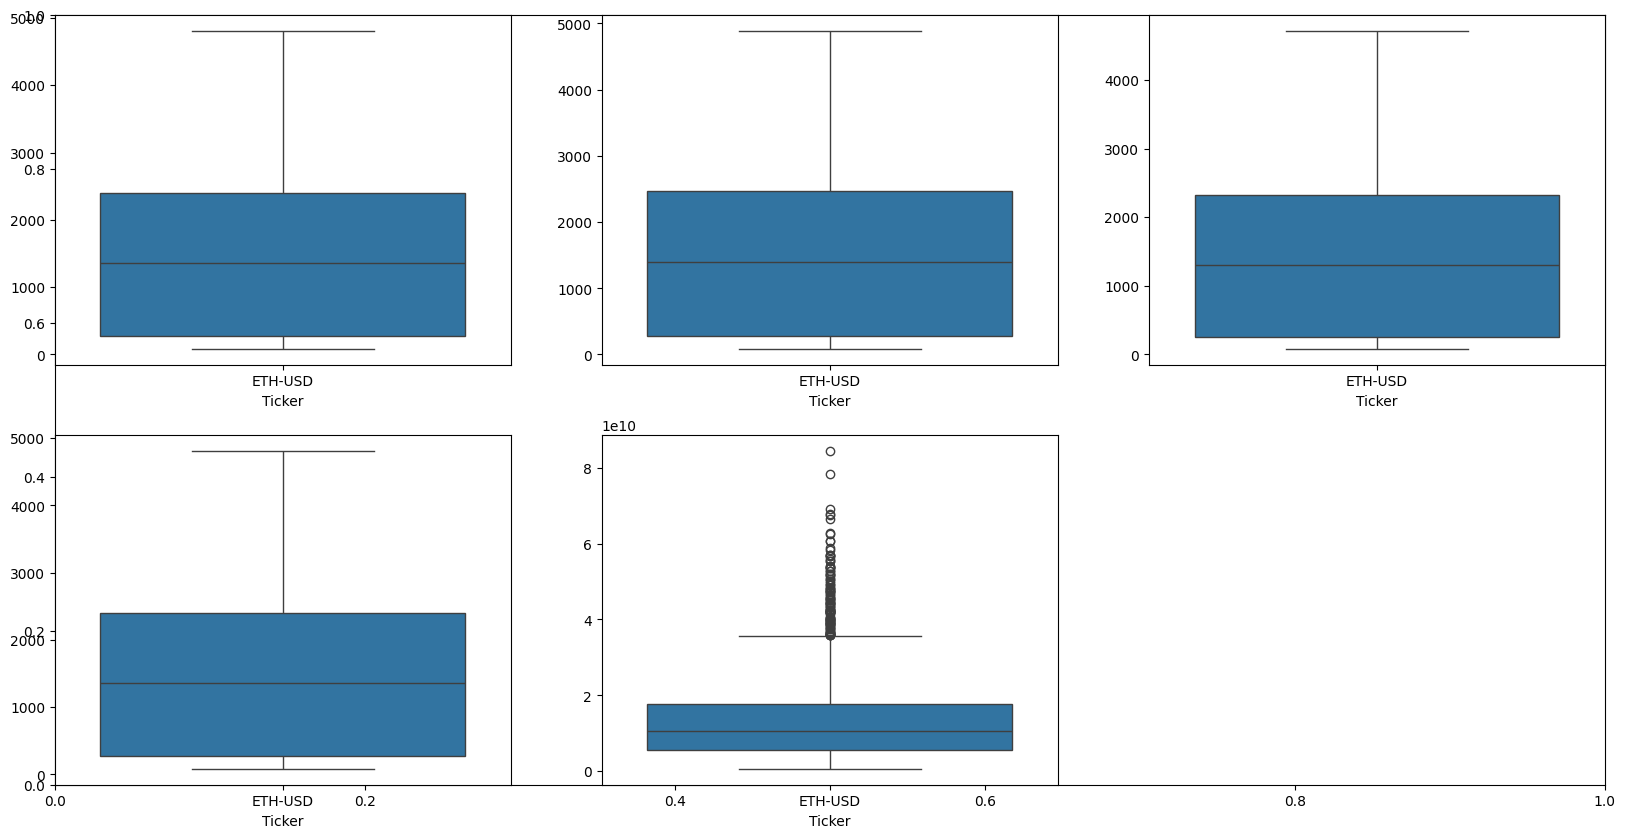

In [ ]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.boxplot(df[col])
plt.show()

In [ ]:
df = df.reset_index()

In [ ]:
df

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,ETH-USD,ETH-USD,ETH-USD,ETH-USD,ETH-USD,ETH-USD
0,2017-11-09,320.884003,320.884003,329.451996,307.056000,308.644989,893249984
1,2017-11-10,299.252991,299.252991,324.717987,294.541992,320.670990,885985984
2,2017-11-11,314.681000,314.681000,319.453003,298.191986,298.585999,842300992
3,2017-11-12,307.907990,307.907990,319.153015,298.513000,314.690002,1613479936
4,2017-11-13,316.716003,316.716003,328.415009,307.024994,307.024994,1041889984
...,...,...,...,...,...,...,...
2604,2024-12-26,3331.225830,3331.225830,3512.604492,3302.306396,3493.304199,22247726776
2605,2024-12-27,3328.916992,3328.916992,3436.710693,3302.575684,3331.053711,24091627403
2606,2024-12-28,3397.902344,3397.902344,3419.920166,3318.033936,3328.774658,14305648523


In [ ]:
df['year'] = df['Date'].dt.year

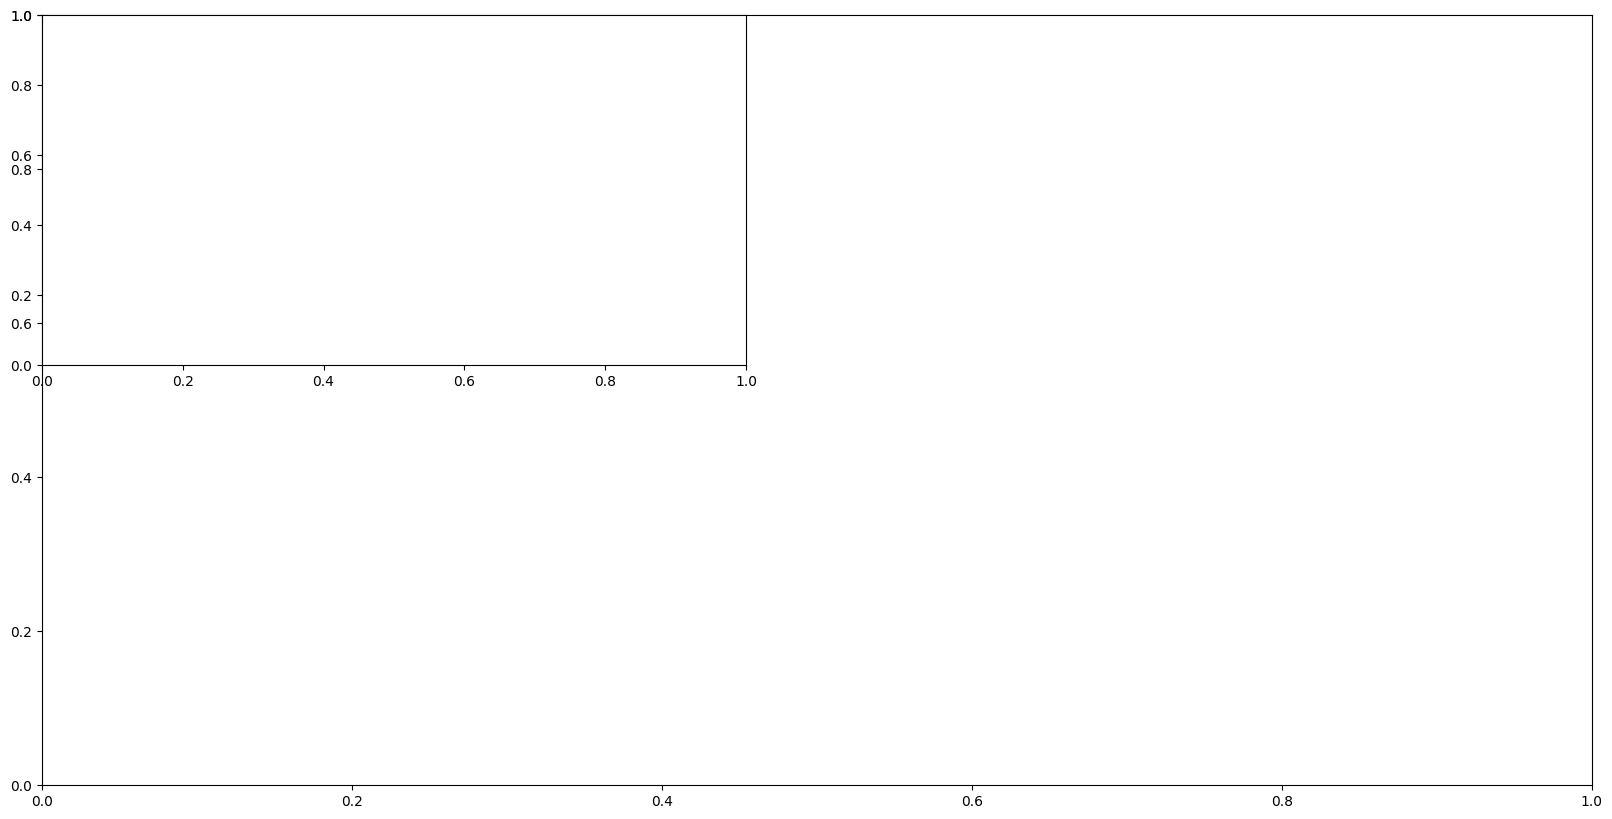

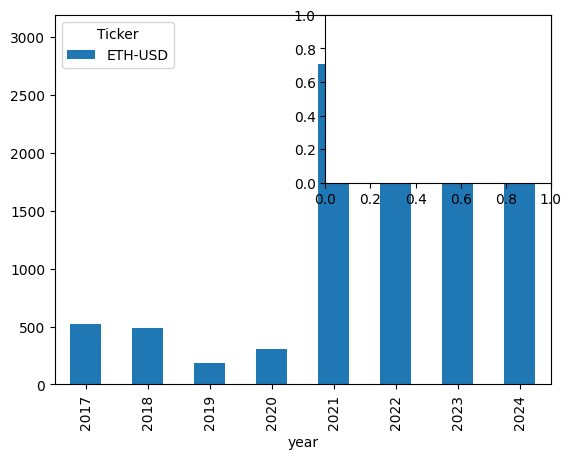

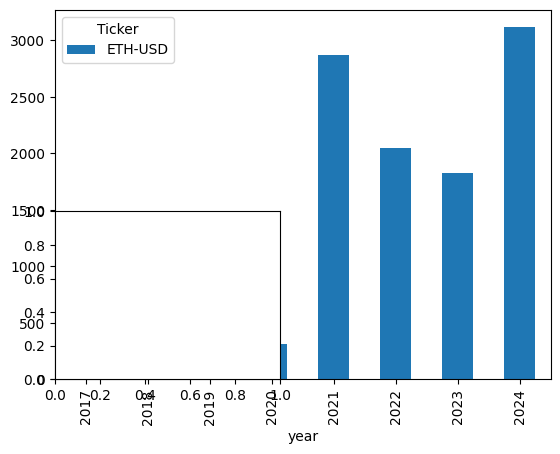

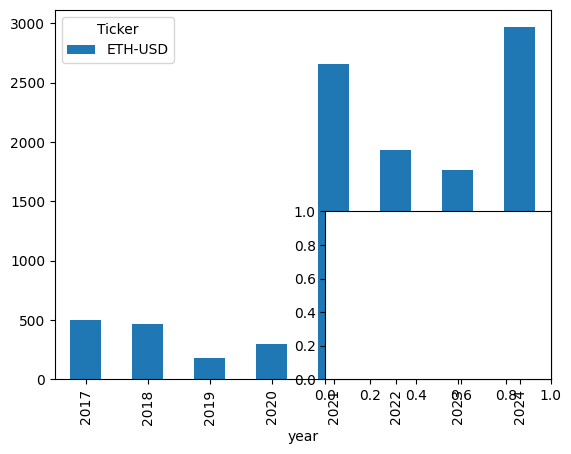

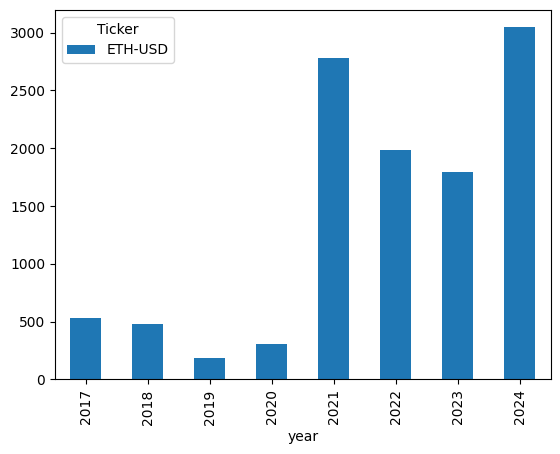

In [ ]:
data_grouped = df.drop('Date', axis=1).groupby('year').mean()
plt.subplots(figsize=(20,10))

for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()

In [ ]:
df['open-close']  = df['Open'] - df['Close']
df['low-high']  = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

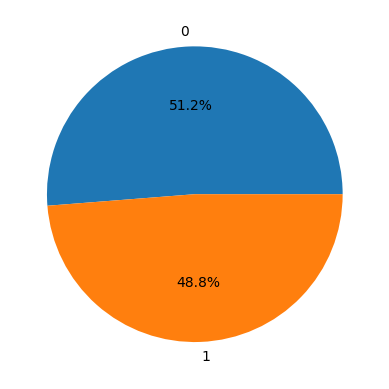

In [ ]:
plt.pie(df['target'].value_counts().values,
        labels=[0, 1], autopct='%1.1f%%')
plt.show()

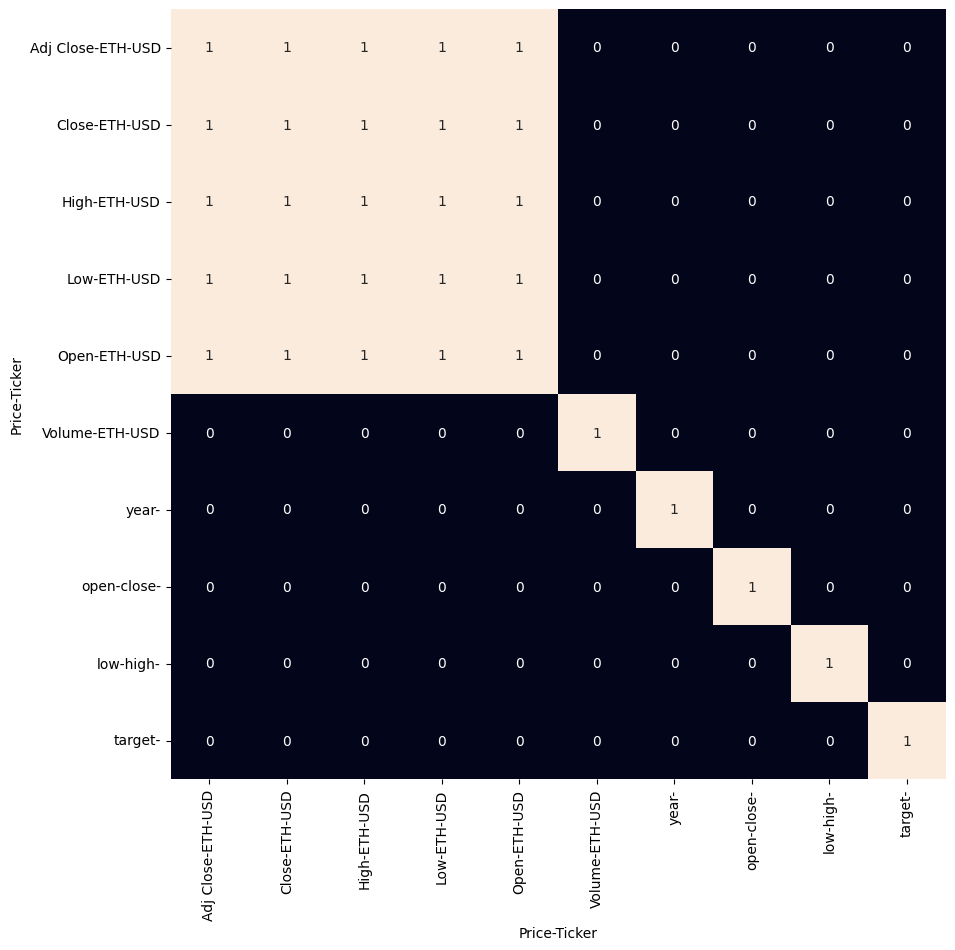

In [ ]:
plt.figure(figsize=(10, 10))

# As our concern is with the highly
# correlated features only so, we will visualize
# our heatmap as per that criteria only.
sb.heatmap(df.drop('Date', axis=1).corr() > 0.9, annot=True, cbar=False)
plt.show()